In [41]:
with open("measurements/ipv4.txt", "r") as f:
    ipv4 = f.read().splitlines()
with open("measurements/ipv6.txt", "r") as f:
    ipv6 = f.read().splitlines()
with open("measurements/nat64.txt", "r") as f:
    nat64 = f.read().splitlines()

In [42]:
import json

def parse(measures):
    # Parse json
    parsed = []
    for measure in measures:
        parsed.append(json.loads(measure))

    return parsed

In [43]:
ipv4 = parse(ipv4)
ipv6 = parse(ipv6)
nat64 = parse(nat64)

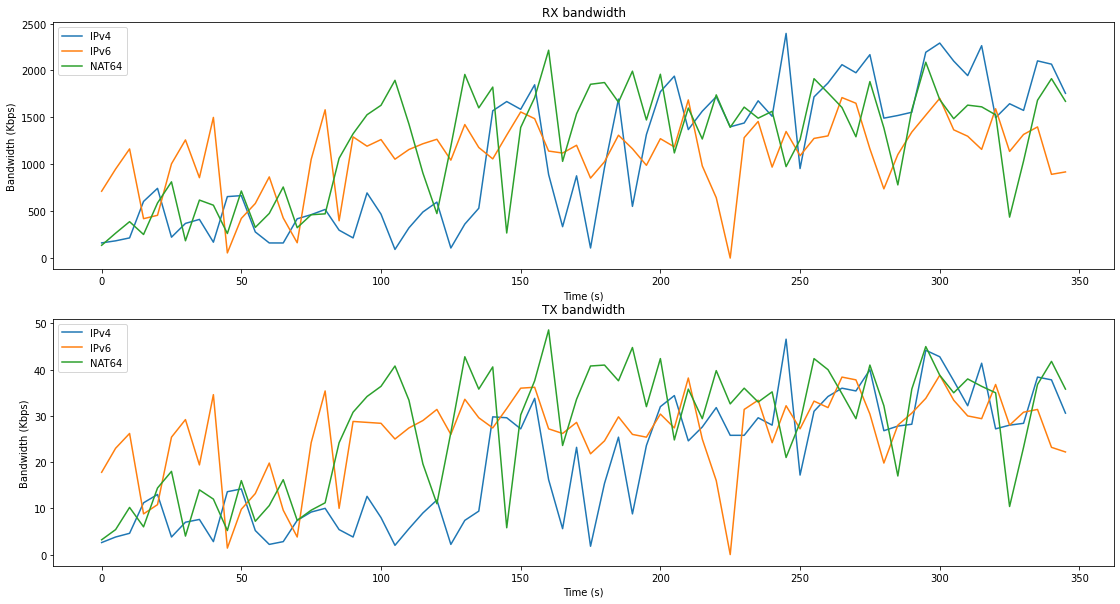

In [55]:
# Plot
import matplotlib.pyplot as plt
import numpy as np

# Description of data structure
# [{
#   "TX": {"bandwidth": int, "throughput": int},
#   "RX": {"bandwidth": int, "throughput": int},
# }]
# TX=transmission, RX=reception
# Bandwith: in Kbps
# Throughput: in packets per second

# Only keep  the first 350 measures
ipv4_ = ipv4[:350]
ipv6_ = ipv6[:350]
nat64_ = nat64[:350]

# Aggregate data: take averages such that we have one measure every n seconds
def aggregate(measures, n):
    aggregated = []
    for i in range(0, len(measures), n):
        aggregated.append({
            "TX": {
                "bandwidth": sum([m["TX"]["bandwidth"] for m in measures[i:i+n]]) / n,
                "throughput": sum([m["TX"]["throughput"] for m in measures[i:i+n]]) / n
            },
            "RX": {
                "bandwidth": sum([m["RX"]["bandwidth"] for m in measures[i:i+n]]) / n,
                "throughput": sum([m["RX"]["throughput"] for m in measures[i:i+n]]) / n
            }
        })
    return aggregated

n = 5
ipv4_ = aggregate(ipv4_, n)
ipv6_ = aggregate(ipv6_, n)
nat64_ = aggregate(nat64_, n)

# Plot bandwidth, compare IPv4, IPv6 and NAT64 in a graph for RX, and another for TX
_, ax = plt.subplots(2, 1, figsize=(19, 10))

# RX
# Set x axis such that each measure is n seconds apart (thus the last one is 350 seconds)
index = np.arange(0, len(ipv4_) * n, n)

# Plot
ax[0].plot(index, [m["RX"]["bandwidth"] for m in ipv4_], label="IPv4")
ax[0].plot(index, [m["RX"]["bandwidth"] for m in ipv6_], label="IPv6")
ax[0].plot(index, [m["RX"]["bandwidth"] for m in nat64_], label="NAT64")
ax[0].set_title("RX bandwidth")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Bandwidth (Kbps)")
ax[0].legend()

# TX
ax[1].plot(index, [m["TX"]["bandwidth"] for m in ipv4_], label="IPv4")
ax[1].plot(index, [m["TX"]["bandwidth"] for m in ipv6_], label="IPv6")
ax[1].plot(index, [m["TX"]["bandwidth"] for m in nat64_], label="NAT64")
ax[1].set_title("TX bandwidth")
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Bandwidth (Kbps)")
ax[1].legend()



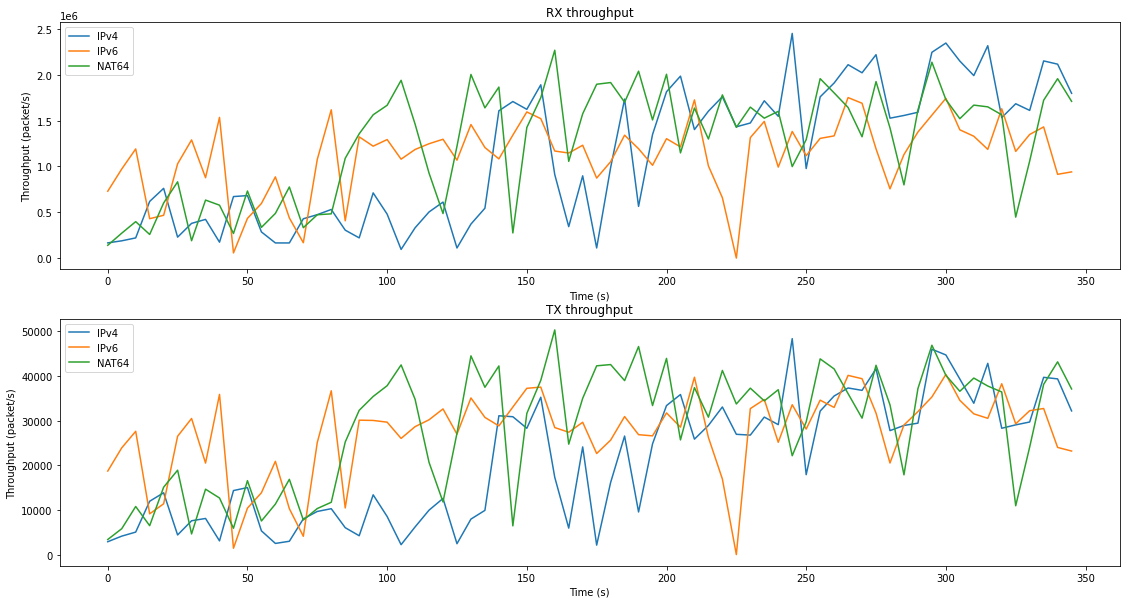

In [57]:
# Plot throughput, compare IPv4, IPv6 and NAT64 in a graph for RX, and another for TX
_, ax = plt.subplots(2, 1, figsize=(19, 10))

# RX
# Set x axis such that each measure is n seconds apart (thus the last one is 350 seconds)
index = np.arange(0, len(ipv4_) * n, n)

# Plot
ax[0].plot(index, [m["RX"]["throughput"] for m in ipv4_], label="IPv4")
ax[0].plot(index, [m["RX"]["throughput"] for m in ipv6_], label="IPv6")
ax[0].plot(index, [m["RX"]["throughput"] for m in nat64_], label="NAT64")
ax[0].set_title("RX throughput")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Throughput (packet/s)")
ax[0].legend()

# TX
ax[1].plot(index, [m["TX"]["throughput"] for m in ipv4_], label="IPv4")
ax[1].plot(index, [m["TX"]["throughput"] for m in ipv6_], label="IPv6")
ax[1].plot(index, [m["TX"]["throughput"] for m in nat64_], label="NAT64")
ax[1].set_title("TX throughput")
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Throughput (packet/s)")
ax[1].legend()